# Load Data

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

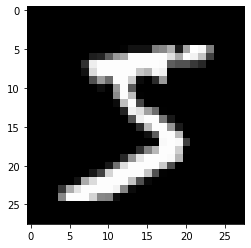

In [6]:
plt.imshow(x_train[0],cmap='gray')

In [7]:
y_train[0]

5

# Converting y to one hot encode

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_train_cat=to_categorical(y_train,num_classes=10)

In [10]:
y_test_cat=to_categorical(y_test,num_classes=10)

# Normalizing X and setting proper dimensions

In [11]:
x_train_normal=x_train/255.0

In [12]:
x_test_normal=x_test/255.0

In [13]:
x_train_normal.max()

1.0

In [14]:
x_train_normal.shape

(60000, 28, 28)

In [15]:
x_train_s=x_train_normal.reshape(60000,28,28,1)

In [16]:
x_train_s.shape

(60000, 28, 28, 1)

In [18]:
x_test_normal.shape

(10000, 28, 28)

In [19]:
x_test_s=x_test_normal.reshape(10000,28,28,1)

In [20]:
x_test_s.shape

(10000, 28, 28, 1)

# Creating model

In [21]:
from keras.models import Sequential

In [22]:
model=Sequential([
                keras.layers.Conv2D(filters=32,kernel_size=(4,4),activation='relu',input_shape=(28,28,1)),
                keras.layers.MaxPool2D(pool_size=(2,2)),
                keras.layers.Flatten(),
                keras.layers.Dense(128,activation='relu'),
                keras.layers.Dense(10,activation='softmax')
    
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.fit(x_train_s,y_train_cat,epochs=2,verbose=1)


Epoch 1/2
60000/60000 [==============================] - 33s 555us/step - loss: 0.1356 - accuracy: 0.9591
Epoch 2/2
60000/60000 [==============================] - 33s 551us/step - loss: 0.0456 - accuracy: 0.9860


In [25]:
model.evaluate(x_test_s,y_test_cat)

10000/10000 [==============================] - 2s 170us/step


[0.0476998198420275, 0.9847999811172485]

In [26]:
y_predictions=model.predict_classes(x_test_s)

In [27]:
y_predictions[0]

7

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [30]:
print(confusion_matrix(y_test,y_predictions))

[[ 975    0    2    0    1    1    0    1    0    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   2    5 1015    4    0    0    0    5    0    1]
 [   0    0    0 1007    0    1    0    2    0    0]
 [   0    0    0    0  973    0    0    1    1    7]
 [   2    0    1   12    0  874    2    0    0    1]
 [   6    2    0    0    7    6  936    0    1    0]
 [   0    0    7    2    0    0    0 1018    1    0]
 [   4    0    5   13    1    2    4    5  935    5]
 [   0    5    1    3    6    2    0    8    1  983]]


# Predicting outputs 

In [41]:
input_img=x_test[3]

In [42]:
input_img.shape

(28, 28)

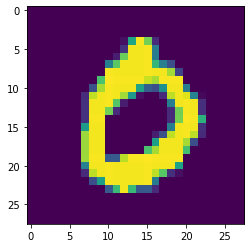

In [43]:
input_img_show=input_img.reshape(28,28)
plt.imshow(input_img)

In [44]:
input_img_modified=input_img.reshape(1,28,28,1)

In [45]:
model.predict_classes(input_img_modified)

array([0], dtype=int64)

In [46]:
model.predict(input_img_modified)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)